<a href="https://colab.research.google.com/github/flyfishjay/crypto_exchange_arb/blob/main/project_3_crypto_arb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install hvplot
  !pip install holoviews
  !pip install fastquant
  !pip install coinmarketcap
  !pip install pandas
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')
  
#to use in colab before every hvplot:  hv.extension('bokeh')

Libraries successfully installed


In [ ]:
  !pip install pandas==1.3.5

     |████████████████████████████████| 11.3 MB 4.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastquant 0.1.7.2 requires pandas==1.1.5, but you have pandas 1.3.5 which is incompatible.


In [ ]:
import pandas as pd 
import numpy as np
from coinmarketcap import Market

from fastquant import get_crypto_data 
from fastquant import backtest
from matplotlib import warnings
%matplotlib inline

In [ ]:
from google.colab import files #  This asks you for a file from your computer to upload 
uploaded = files.upload()




Saving coinmarketcap_eth_history.csv to coinmarketcap_eth_history.csv


In [ ]:
coinmarketcap_eth_df = pd.read_csv('coinmarketcap_eth_history.csv', index_col = 'Date', parse_dates=True, infer_datetime_format=True)
coinmarketcap_close_df = coinmarketcap_eth_df.drop(columns='Market Cap')
coinmarketcap_close_df.rename(columns={'Close**': 'coinmarketcap_close'}, inplace=True)                                                   
coinmarketcap_close_df.tail()



,Open*,High,Low,coinmarketcap_close,Volume
Date,,,,,
2020-12-28,$683.21,$745.88,$683.21,$730.40,"$24,222,565,862"
2020-12-27,$635.89,$711.39,$628.33,$682.64,"$26,093,552,821"
2020-12-26,$626.50,$650.72,$617.40,$635.84,"$14,761,125,202"
2020-12-25,$611.55,$633.06,$605.42,$626.41,"$13,520,927,700"
2020-12-24,$584.14,$613.82,$568.60,$611.61,"$14,317,413,703"


In [ ]:
coinmarketcap_close_df['coinmarketcap_close'] = coinmarketcap_close_df['coinmarketcap_close'].str.replace('$','')
coinmarketcap_close_df.head()

,Open*,High,Low,coinmarketcap_close,Volume
Date,,,,,
2022-02-22,"$2,572.90","$2,648.92","$2,510.68","2,639.30","$16,360,200,507"
2022-02-21,"$2,627.67","$2,752.46","$2,568.25","2,573.82","$18,646,392,740"
2022-02-20,"$2,763.76","$2,763.76","$2,585.95","2,628.65","$11,641,437,834"
2022-02-19,"$2,784.87","$2,826.35","$2,707.38","2,763.70","$9,774,183,169"
2022-02-18,"$2,884.34","$2,937.31","$2,761.64","2,785.73","$15,748,173,433"


In [ ]:
binance_price_df = get_crypto_data('ETHUSDT', '2020-12-24', '2022-02-22')
binance_close_df=binance_price_df 
binance_close_df.rename(columns={'close': 'binance_close'}, inplace=True)
binance_close_df=binance_close_df[['binance_close']]

binance_close_df.head()


,binance_close
dt,
2020-12-24,612.31
2020-12-25,626.82
2020-12-26,637.44
2020-12-27,685.11
2020-12-28,730.41


In [ ]:
eth_concat=pd.concat([coinmarketcap_close_df, binance_close_df], axis=1)
eth_df=eth_concat[['coinmarketcap_close', 'binance_close']]
eth_df.head()

,coinmarketcap_close,binance_close
2020-12-24,611.61,612.31
2020-12-25,626.41,626.82
2020-12-26,635.84,637.44
2020-12-27,682.64,685.11
2020-12-28,730.40,730.41


In [ ]:
eth_df['coinmarketcap_close']=eth_df['coinmarketcap_close'].str.replace(',','')

In [ ]:
eth_df['coinmarketcap_close']= eth_df['coinmarketcap_close'].astype(float)

In [ ]:
eth_df.head(20)

,coinmarketcap_close,binance_close
2020-12-24,611.61,612.31
2020-12-25,626.41,626.82
2020-12-26,635.84,637.44
2020-12-27,682.64,685.11
2020-12-28,730.40,730.41
2020-12-29,731.52,732.00
2020-12-30,751.62,752.17
2020-12-31,737.80,736.42
2021-01-01,730.37,728.91
2021-01-02,774.53,774.56


In [ ]:
 #Arbitrage Spread
 
eth_df['arbitrage_spread'] = abs(eth_df['binance_close'] - eth_df['coinmarketcap_close'])/((eth_df['binance_close'] + eth_df['coinmarketcap_close'])/2)
eth_df['arbitrage_spread_dollars'] = abs(eth_df['binance_close'] - eth_df['coinmarketcap_close'])

eth_df.head()

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars
2020-12-24,611.61,612.31,0.001144,NaN,0.70
2020-12-25,626.41,626.82,0.000654,0.023697,0.41
2020-12-26,635.84,637.44,0.002513,0.016943,1.60
2020-12-27,682.64,685.11,0.003612,0.074784,2.47
2020-12-28,730.40,730.41,0.000014,0.066121,0.01


In [ ]:
#Trading Algo 

In [ ]:
eth_df["Actual Returns Binance"]= eth_df['binance_close'].pct_change()
#eth_df.drop(columns = ['Actual Returns Binance', 'Actual Returns CoinMarketCap'], inplace = True)
eth_df.head()

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars
2020-12-24,611.61,612.31,0.001144,NaN,0.70
2020-12-25,626.41,626.82,0.000654,0.023697,0.41
2020-12-26,635.84,637.44,0.002513,0.016943,1.60
2020-12-27,682.64,685.11,0.003612,0.074784,2.47
2020-12-28,730.40,730.41,0.000014,0.066121,0.01


In [ ]:
#Zero Fee

returns_df = eth_df.dropna()
returns_df.head()

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars
2020-12-25,626.41,626.82,0.000654,0.023697,0.41
2020-12-26,635.84,637.44,0.002513,0.016943,1.60
2020-12-27,682.64,685.11,0.003612,0.074784,2.47
2020-12-28,730.40,730.41,0.000014,0.066121,0.01
2020-12-29,731.52,732.00,0.000656,0.002177,0.48


In [ ]:
# Low Volatility 

returns_df['lowvol_arb_spread']= returns_df['arbitrage_spread']-0.0054
returns_df.head()

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars,lowvol_arb_spread
2020-12-25,626.41,626.82,0.000654,0.023697,0.41,-0.004746
2020-12-26,635.84,637.44,0.002513,0.016943,1.60,-0.002887
2020-12-27,682.64,685.11,0.003612,0.074784,2.47,-0.001788
2020-12-28,730.40,730.41,0.000014,0.066121,0.01,-0.005386
2020-12-29,731.52,732.00,0.000656,0.002177,0.48,-0.004744


In [ ]:
# Medium Volatility 

returns_df['medvol_arb_spread']= returns_df['arbitrage_spread']-0.0130
returns_df.head()


,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars,lowvol_arb_spread,medvol_arb_spread
2020-12-25,626.41,626.82,0.000654,0.023697,0.41,-0.004746,-0.012346
2020-12-26,635.84,637.44,0.002513,0.016943,1.60,-0.002887,-0.010487
2020-12-27,682.64,685.11,0.003612,0.074784,2.47,-0.001788,-0.009388
2020-12-28,730.40,730.41,0.000014,0.066121,0.01,-0.005386,-0.012986
2020-12-29,731.52,732.00,0.000656,0.002177,0.48,-0.004744,-0.012344


In [ ]:
# High Volatility 

returns_df['highvol_arb_spread']= returns_df['arbitrage_spread']-0.0440
returns_df.head()


,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars,lowvol_arb_spread,medvol_arb_spread,highvol_arb_spread
2020-12-25,626.41,626.82,0.000654,0.023697,0.41,-0.004746,-0.012346,-0.043346
2020-12-26,635.84,637.44,0.002513,0.016943,1.60,-0.002887,-0.010487,-0.041487
2020-12-27,682.64,685.11,0.003612,0.074784,2.47,-0.001788,-0.009388,-0.040388
2020-12-28,730.40,730.41,0.000014,0.066121,0.01,-0.005386,-0.012986,-0.043986
2020-12-29,731.52,732.00,0.000656,0.002177,0.48,-0.004744,-0.012344,-0.043344


In [ ]:
arb_spread_df = returns_df.dropna()
arb_spread_df.head()

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars,lowvol_arb_spread,medvol_arb_spread,highvol_arb_spread
2020-12-25,626.41,626.82,0.000654,0.023697,0.41,-0.004746,-0.012346,-0.043346
2020-12-26,635.84,637.44,0.002513,0.016943,1.60,-0.002887,-0.010487,-0.041487
2020-12-27,682.64,685.11,0.003612,0.074784,2.47,-0.001788,-0.009388,-0.040388
2020-12-28,730.40,730.41,0.000014,0.066121,0.01,-0.005386,-0.012986,-0.043986
2020-12-29,731.52,732.00,0.000656,0.002177,0.48,-0.004744,-0.012344,-0.043344


In [ ]:
# no fee scenario
arb_spread_df["Zerofee_Signal"]= np.where(arb_spread_df["arbitrage_spread"] > 0, 1.0, 0)

# low vol scenario
arb_spread_df["LowVol_Signal"]= np.where(arb_spread_df["lowvol_arb_spread"] > 0, 1.0, 0)

# mid vol scenario
arb_spread_df["MedVol_Signal"]= np.where(arb_spread_df["medvol_arb_spread"] > 0, 1.0, 0)

# high vol scenario
arb_spread_df["HighVol_Signal"]= np.where(arb_spread_df["highvol_arb_spread"] > 0, 1.0, 0)


# Review the DataFrame
arb_spread_df.head(10)

,coinmarketcap_close,binance_close,arbitrage_spread,Actual Returns Binance,arbitrage_spread_dollars,lowvol_arb_spread,medvol_arb_spread,highvol_arb_spread,Zerofee_Signal,LowVol_Signal,MedVol_Signal,HighVol_Signal
2020-12-25,626.41,626.82,0.000654,0.023697,0.41,-0.004746,-0.012346,-0.043346,1.0,0.0,0.0,0.0
2020-12-26,635.84,637.44,0.002513,0.016943,1.60,-0.002887,-0.010487,-0.041487,1.0,0.0,0.0,0.0
2020-12-27,682.64,685.11,0.003612,0.074784,2.47,-0.001788,-0.009388,-0.040388,1.0,0.0,0.0,0.0
2020-12-28,730.40,730.41,0.000014,0.066121,0.01,-0.005386,-0.012986,-0.043986,1.0,0.0,0.0,0.0
2020-12-29,731.52,732.00,0.000656,0.002177,0.48,-0.004744,-0.012344,-0.043344,1.0,0.0,0.0,0.0
2020-12-30,751.62,752.17,0.000731,0.027555,0.55,-0.004669,-0.012269,-0.043269,1.0,0.0,0.0,0.0
2020-12-31,737.80,736.42,0.001872,-0.020939,1.38,-0.003528,-0.011128,-0.042128,1.0,0.0,0.0,0.0
2021-01-01,730.37,728.91,0.002001,-0.010198,1.46,-0.003399,-0.010999,-0.041999,1.0,0.0,0.0,0.0
2021-01-02,774.53,774.56,0.000039,0.062628,0.03,-0.005361,-0.012961,-0.043961,1.0,0.0,0.0,0.0
2021-01-03,975.51,978.28,0.002836,0.263014,2.77,-0.002564,-0.010164,-0.041164,1.0,0.0,0.0,0.0


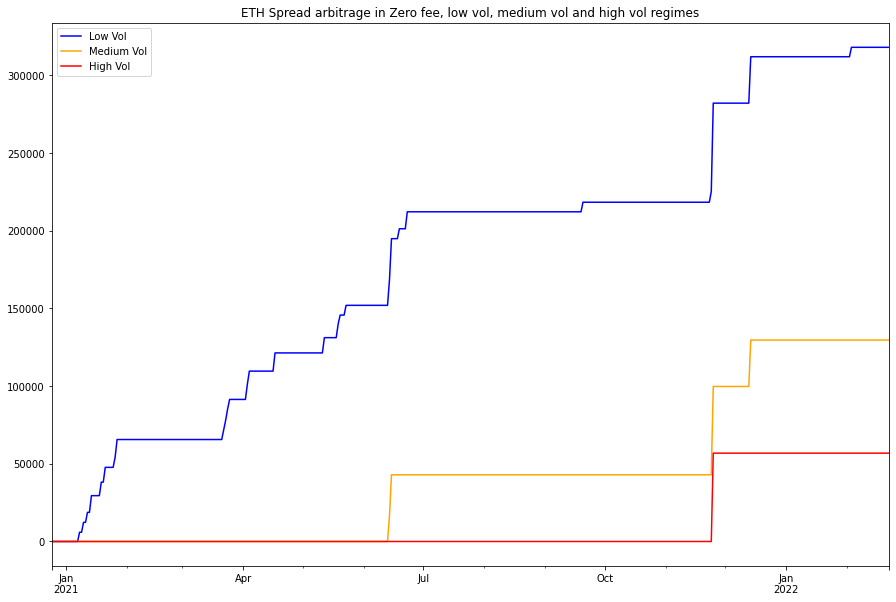

In [ ]:
# Pnl 
eth_df['arbitrage_spread_dollars'] = abs(eth_df['binance_close'] - eth_df['coinmarketcap_close'])

aum = 1000000
position = aum/((arb_spread_df['coinmarketcap_close'] + arb_spread_df['binance_close'])/2)

profit_trades_zero_fee= arb_spread_df['Zerofee_Signal']*arb_spread_df['arbitrage_spread_dollars']*position
profit_trades_lowvol= arb_spread_df['LowVol_Signal']*arb_spread_df['arbitrage_spread_dollars']*position
profit_trades_medvol= arb_spread_df['MedVol_Signal']*arb_spread_df['arbitrage_spread_dollars']*position
profit_trades_highvol= arb_spread_df['HighVol_Signal']*arb_spread_df['arbitrage_spread_dollars']*position


profit_trades_lowvol.cumsum().plot(
    legend=True, figsize=(15,10), title = 'ETH Spread arbitrage in Zero fee, low vol, medium vol and high vol regimes', color = 'blue', label = 'Low Vol')
profit_trades_medvol.cumsum().plot(
    legend=True, figsize=(15,10), color = 'orange', label = 'Medium Vol')
profit_trades_highvol.cumsum().plot(
    legend=True, figsize=(15,10), color = 'red', label = 'High Vol')


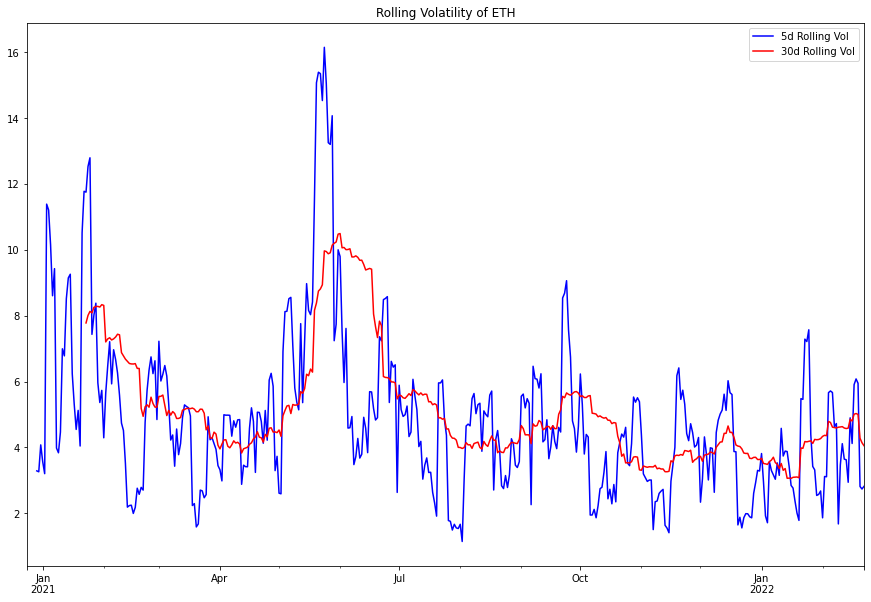

In [ ]:
# Volatility 


eth_df['coinmarketcap_pctchange'] = eth_df['coinmarketcap_close'].pct_change()
eth_df['binance_pctchange'] = eth_df['binance_close'].pct_change()

eth_df['coinmarketcap_5dvol'] = eth_df['coinmarketcap_pctchange'].rolling(5).std()*100
eth_df['binance_5dvol'] = eth_df['binance_pctchange'].rolling(5).std()*100

eth_df['coinmarketcap_5dvol'] = eth_df['coinmarketcap_pctchange'].rolling(5).std()*100
eth_df['binance_5dvol'] = eth_df['binance_pctchange'].rolling(5).std()*100

eth_df['coinmarketcap_30dvol'] = eth_df['coinmarketcap_pctchange'].rolling(30).std()*100
eth_df['binance_30dvol'] = eth_df['binance_pctchange'].rolling(30).std()*100


eth_df['coinmarketcap_5dvol'].plot(
    legend=True, figsize=(15,10), title = 'Rolling Volatility of ETH', color = 'blue', label = '5d Rolling Vol')

eth_df['coinmarketcap_30dvol'].plot(
    legend=True, figsize=(15,10), color = 'red', label = '30d Rolling Vol')

In [ ]:
#Max --trading costs; 
#Kanika --arb spread;  skelaton to trading algo 
#Jay --data import; df; risk


#Nice to haves
#pnl and pnl charts 



#Other avenues of research 
#increase freqency of data 
#different coins 

#beta 
#correlation vs equity market
#correlation vs gold
#over differnt time periods 
#volatility of ETH over different time frequencies (volatility regimes --connect to arb spread;  higher vol = wider arb spread?)
#look at the distribution of daily returns 
#skew and kurtosis 







In [ ]:
from google.colab import files #  This asks you for a file from your computer to upload 
uploaded = files.upload()

Saving Vol_Costs.csv to Vol_Costs (1).csv


In [ ]:
arb_cost_df = pd.read_csv('Vol_Costs.csv')

In [ ]:
arb_cost_df.head()

,Volatility Level,Total Arb Fees
0,No Fee,0.00%
1,Low,0.54%
2,Medium,1.30%
3,High,4.40%


In [ ]:
# Loop through Arb Fees
for index, row in arb_cost_df.iterrows():
    
    # No Fee Scenario
    if "Volatility Level" == "No Fee"
        arb_cost_df.loc[index, "Total Arb Fees"] = 0.00%

        
    # Low Vol/Low Fee Scenario
    elif row["Volatility Level"] == "Low"
        arb_cost_df.loc[index, "Total Arb Fees"] = 0.54%

        
    # Medium Vol/Medium Fee Scenario
    elif row["Volatility Level"] == "Medium"
        arb_cost_df.loc[index, "Total Arb Fees"] = 1.30%

        
    # High Vol/High Fee Scenario
    else:
        arb_cost_df.loc[index, "Volatility Level"] = "High"
            arb_cost_df.loc[index, "Total Arb Fees"] = 4.40%

SyntaxError: ignored